In [1]:
import polars as pl
import matplotlib.pyplot as plt
import random
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import seaborn as sns
from sklearn.metrics import silhouette_score
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
selected_cols = ["DATE", "TAVG", "TMAX", "TMIN"]
lf_1945 = pl.scan_csv("data/1945T1955.csv").select(selected_cols)
lf_1955 = pl.scan_csv("data/1955T1965.csv").select(selected_cols)
lf_1965 = pl.scan_csv("data/1965T1975.csv").select(selected_cols)
lf_1975 = pl.scan_csv("data/1975T1985.csv").select(selected_cols)
lf_1985 = pl.scan_csv("data/1985T1995.csv").select(selected_cols)
lf_1995 = pl.scan_csv("data/1995T2005.csv").select(selected_cols)
lf_2005 = pl.scan_csv("data/2005T2015.csv").select(selected_cols)
lf_2015 = pl.scan_csv("data/2015T2025.csv").select(selected_cols)

lf_1945 = lf_1945.with_columns(

    pl.col("TAVG").cast(pl.Int64)
    
)

lf_1955 = lf_1955.with_columns(

    pl.col("TAVG").cast(pl.Int64),
    pl.col("DATE").str.to_date(format="%m/%d/%Y").dt.strftime("%Y-%m-%d")
    
)

lf_1965 = lf_1965.with_columns(

    pl.col("TAVG").cast(pl.Int64)
    
)

lf_1975 = lf_1975.with_columns(

    pl.col("TAVG").cast(pl.Int64)
    
)

lf_1985 = lf_1985.with_columns(

    pl.col("TAVG").cast(pl.Int64)
    
)

lf_1995 = lf_1995.with_columns(

    pl.col("TAVG").cast(pl.Int64)
    
)

lf_2005 = lf_2005.with_columns(

    pl.col("TAVG").cast(pl.Int64),
    pl.col("DATE").str.to_date(format="%m/%d/%Y").dt.strftime("%Y-%m-%d")
    
)

In [3]:
lf_full = pl.concat([lf_1945, lf_1955, lf_1965, lf_1975, lf_1985, lf_1995, lf_2005, lf_2015], how='vertical')
lf_full.collect()

DATE,TAVG,TMAX,TMIN
str,i64,i64,i64
"""1954-04-01""",null,78,67
"""1954-04-02""",null,78,69
"""1954-04-03""",null,73,65
"""1954-04-04""",null,76,60
"""1954-04-05""",null,79,63
…,…,…,…
"""2025-08-10""",78,89,67
"""2025-08-11""",80,91,69
"""2025-08-12""",82,89,75


In [4]:
lf_full.describe()

statistic,DATE,TAVG,TMAX,TMIN
str,str,f64,f64,f64
"""count""","""26069""",7186.0,26049.0,25951.0
"""null_count""","""0""",18883.0,20.0,118.0
"""mean""",null,76.317562,84.1916,67.54522
"""std""",null,4.595622,4.097892,4.604441
"""min""","""1954-04-01""",0.0,65.0,48.0
"""25%""",null,74.0,81.0,64.0
"""50%""",null,77.0,85.0,68.0
"""75%""",null,79.0,87.0,71.0
"""max""","""2025-08-14""",86.0,97.0,79.0


In [5]:
x_labels = lf_full.select("DATE").filter(pl.col("DATE").str.ends_with("5-01-01")).collect().to_series()

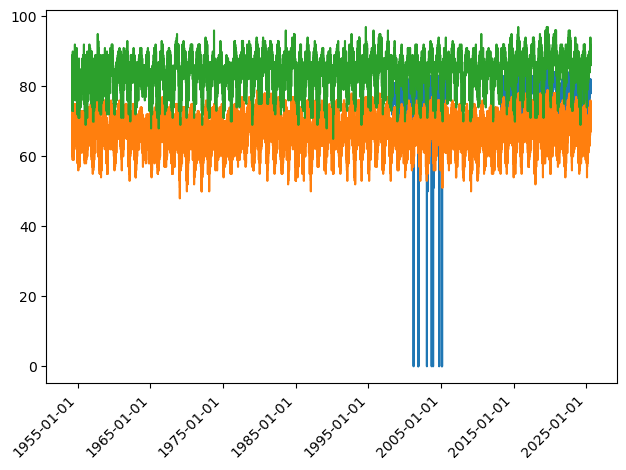

In [6]:
plt.plot(lf_full.select("DATE").collect().to_series(), lf_full.select("TAVG").collect().to_series())
plt.plot(lf_full.select("DATE").collect().to_series(), lf_full.select("TMIN").collect().to_series())
plt.plot(lf_full.select("DATE").collect().to_series(), lf_full.select("TMAX").collect().to_series())
plt.xticks(x_labels, rotation=45, ha="right")
plt.tight_layout()
plt.show()

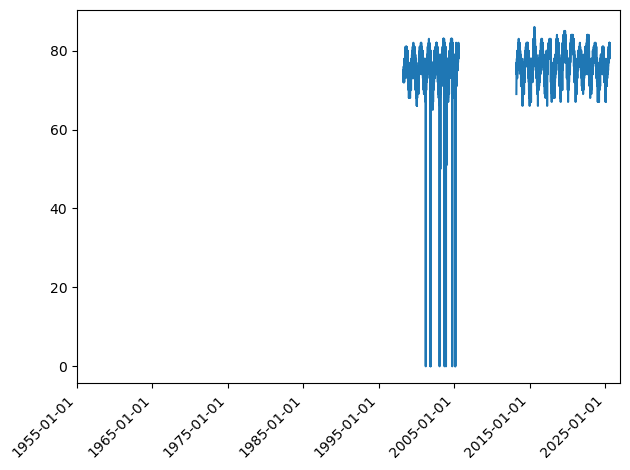

In [7]:
plt.plot(lf_full.select("DATE").collect().to_series(), lf_full.select("TAVG").collect().to_series())
plt.xticks(x_labels, rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [8]:
lf_full = lf_full.with_columns(

    pl.col("TAVG").shift(-1).alias("TAVG_NEXT"),
    pl.col("TAVG").shift(1).alias("TAVG_PREV"),
    pl.col("DATE").str.slice(5, 10).alias("DAY")
    
)
lf_full.collect()

DATE,TAVG,TMAX,TMIN,TAVG_NEXT,TAVG_PREV,DAY
str,i64,i64,i64,i64,i64,str
"""1954-04-01""",null,78,67,null,null,"""04-01"""
"""1954-04-02""",null,78,69,null,null,"""04-02"""
"""1954-04-03""",null,73,65,null,null,"""04-03"""
"""1954-04-04""",null,76,60,null,null,"""04-04"""
"""1954-04-05""",null,79,63,null,null,"""04-05"""
…,…,…,…,…,…,…
"""2025-08-10""",78,89,67,80,79,"""08-10"""
"""2025-08-11""",80,91,69,82,78,"""08-11"""
"""2025-08-12""",82,89,75,80,80,"""08-12"""


In [9]:
lf_full = lf_full.with_columns(

    pl.when((pl.col("TAVG") < pl.col("TMIN")) | (pl.col("TAVG") > pl.col("TMAX")))
        .then((pl.col("TAVG_NEXT") + pl.col("TAVG_PREV")) / 2)
        .otherwise(pl.col("TAVG")).alias("TAVG")

)

lf_full.collect()

DATE,TAVG,TMAX,TMIN,TAVG_NEXT,TAVG_PREV,DAY
str,f64,i64,i64,i64,i64,str
"""1954-04-01""",null,78,67,null,null,"""04-01"""
"""1954-04-02""",null,78,69,null,null,"""04-02"""
"""1954-04-03""",null,73,65,null,null,"""04-03"""
"""1954-04-04""",null,76,60,null,null,"""04-04"""
"""1954-04-05""",null,79,63,null,null,"""04-05"""
…,…,…,…,…,…,…
"""2025-08-10""",78.0,89,67,80,79,"""08-10"""
"""2025-08-11""",80.0,91,69,82,78,"""08-11"""
"""2025-08-12""",82.0,89,75,80,80,"""08-12"""


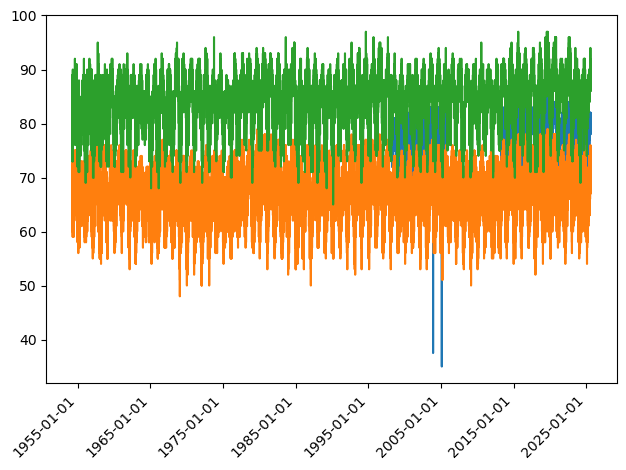

In [10]:
plt.plot(lf_full.select("DATE").collect().to_series(), lf_full.select("TAVG").collect().to_series())
plt.plot(lf_full.select("DATE").collect().to_series(), lf_full.select("TMIN").collect().to_series())
plt.plot(lf_full.select("DATE").collect().to_series(), lf_full.select("TMAX").collect().to_series())
plt.xticks(x_labels, rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [11]:
noise = lf_full.filter((pl.col("TAVG") < pl.col("TMIN")) | (pl.col("TAVG") > pl.col("TMAX")))
noise.collect()

DATE,TAVG,TMAX,TMIN,TAVG_NEXT,TAVG_PREV,DAY
str,f64,i64,i64,i64,i64,str
"""2003-12-01""",39.0,77,72,0,78,"""12-01"""
"""2003-12-02""",37.5,73,70,75,0,"""12-02"""
"""2005-01-02""",73.5,73,67,73,74,"""01-02"""
"""2005-02-12""",35.0,77,66,0,70,"""02-12"""
"""2005-02-13""",36.0,75,66,72,0,"""02-13"""


In [12]:
lf_full_no_noise = lf_full.filter(~(pl.col("TAVG") < pl.col("TMIN")) | (pl.col("TAVG") > pl.col("TMAX"))).select("DAY", "TAVG", "TMAX", "TMIN")
lf_full_no_noise = lf_full_no_noise.with_columns(

    ((pl.col("TAVG") - pl.col("TMIN")) / (pl.col("TMAX") - pl.col("TMIN"))).alias("AVG_INDEX")

)
avg_index_daygb = lf_full_no_noise.select(["DAY", "AVG_INDEX"]).group_by("DAY").mean()
avg_index_daygb.collect()

DAY,AVG_INDEX
str,f64
"""04-13""",0.472891
"""11-18""",0.484889
"""02-26""",0.488033
"""07-18""",0.465718
"""06-22""",0.500793
…,…
"""11-02""",0.491642
"""12-12""",0.464709
"""05-10""",0.470959


In [13]:
lf_full = lf_full.join(avg_index_daygb, on="DAY")
lf_full.collect()

DATE,TAVG,TMAX,TMIN,TAVG_NEXT,TAVG_PREV,DAY,AVG_INDEX
str,f64,i64,i64,i64,i64,str,f64
"""1954-04-01""",null,78,67,null,null,"""04-01""",0.509094
"""1954-04-02""",null,78,69,null,null,"""04-02""",0.494966
"""1954-04-03""",null,73,65,null,null,"""04-03""",0.460848
"""1954-04-04""",null,76,60,null,null,"""04-04""",0.49379
"""1954-04-05""",null,79,63,null,null,"""04-05""",0.487971
…,…,…,…,…,…,…,…
"""2025-08-10""",78.0,89,67,80,79,"""08-10""",0.461912
"""2025-08-11""",80.0,91,69,82,78,"""08-11""",0.472883
"""2025-08-12""",82.0,89,75,80,80,"""08-12""",0.468168


In [14]:
lf_full = lf_full.with_columns(

    pl.when((pl.col("TAVG") < pl.col("TMIN")) | (pl.col("TAVG") > pl.col("TMAX")))
    .then(pl.col("AVG_INDEX") * (pl.col("TMAX") - pl.col("TMIN")) + pl.col("TMIN"))
    .otherwise(pl.col("TAVG")).alias("TAVG")

)

lf_full.collect()

DATE,TAVG,TMAX,TMIN,TAVG_NEXT,TAVG_PREV,DAY,AVG_INDEX
str,f64,i64,i64,i64,i64,str,f64
"""1954-04-01""",null,78,67,null,null,"""04-01""",0.509094
"""1954-04-02""",null,78,69,null,null,"""04-02""",0.494966
"""1954-04-03""",null,73,65,null,null,"""04-03""",0.460848
"""1954-04-04""",null,76,60,null,null,"""04-04""",0.49379
"""1954-04-05""",null,79,63,null,null,"""04-05""",0.487971
…,…,…,…,…,…,…,…
"""2025-08-10""",78.0,89,67,80,79,"""08-10""",0.461912
"""2025-08-11""",80.0,91,69,82,78,"""08-11""",0.472883
"""2025-08-12""",82.0,89,75,80,80,"""08-12""",0.468168


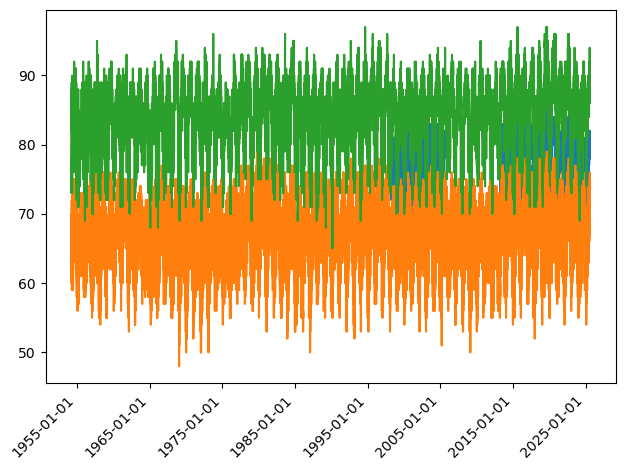

In [15]:
plt.plot(lf_full.select("DATE").collect().to_series(), lf_full.select("TAVG").collect().to_series())
plt.plot(lf_full.select("DATE").collect().to_series(), lf_full.select("TMIN").collect().to_series())
plt.plot(lf_full.select("DATE").collect().to_series(), lf_full.select("TMAX").collect().to_series())
plt.xticks(x_labels, rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [16]:
lf_full.filter((pl.col("TAVG") < pl.col("TMIN")) | (pl.col("TAVG") > pl.col("TMAX"))).collect()

DATE,TAVG,TMAX,TMIN,TAVG_NEXT,TAVG_PREV,DAY,AVG_INDEX
str,f64,i64,i64,i64,i64,str,f64


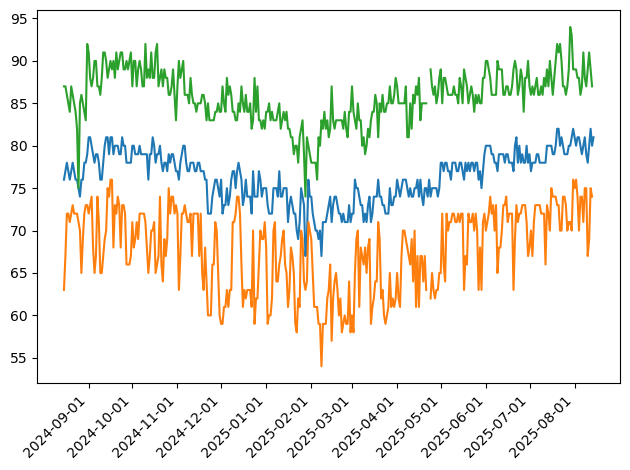

In [17]:
lf_tail = lf_full.tail(365)
x_labels = lf_tail.select("DATE").filter(pl.col("DATE").str.ends_with("01")).collect().to_series()
plt.plot(lf_tail.select("DATE").collect().to_series(), lf_tail.select("TAVG").collect().to_series())
plt.plot(lf_tail.select("DATE").collect().to_series(), lf_tail.select("TMIN").collect().to_series())
plt.plot(lf_tail.select("DATE").collect().to_series(), lf_tail.select("TMAX").collect().to_series())
plt.xticks(x_labels, rotation=45, ha="right")
plt.tight_layout()
plt.show()

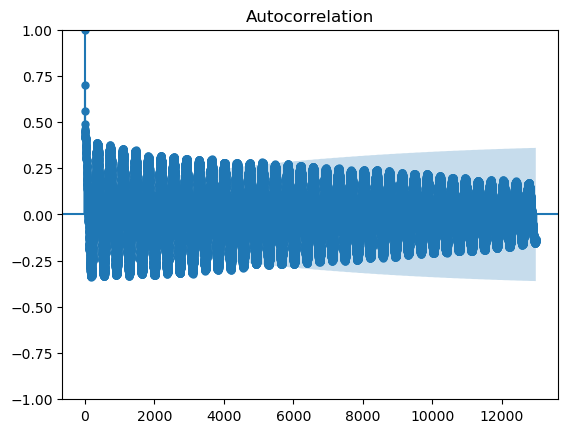

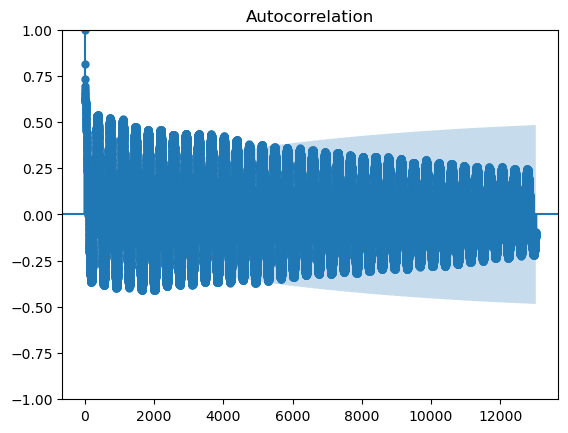

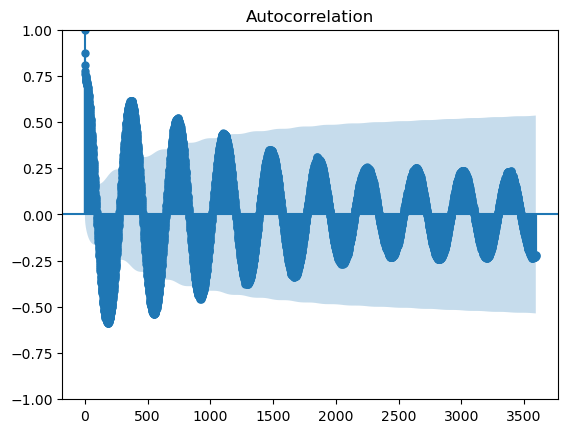

In [18]:
plot_acf(lf_full.select("TMIN").collect().drop_nulls().to_series(), lags=lf_full.select("TMIN").drop_nulls().select(pl.len()).collect().item() // 2)
plot_acf(lf_full.select("TMAX").collect().drop_nulls().to_series(), lags=lf_full.select("TMAX").drop_nulls().select(pl.len()).collect().item() // 2)
plot_acf(lf_full.select("TAVG").collect().drop_nulls().to_series(), lags=lf_full.select("TAVG").drop_nulls().select(pl.len()).collect().item() // 2)
plt.show()

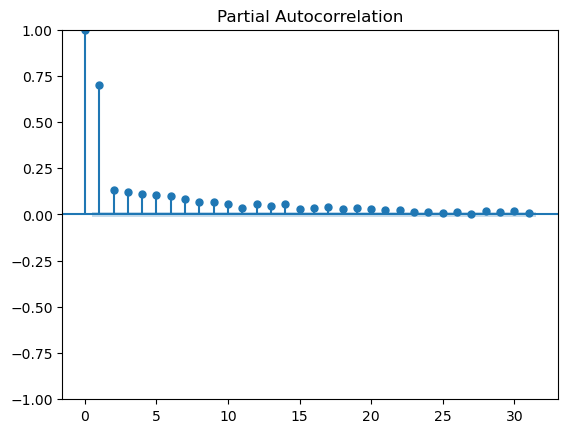

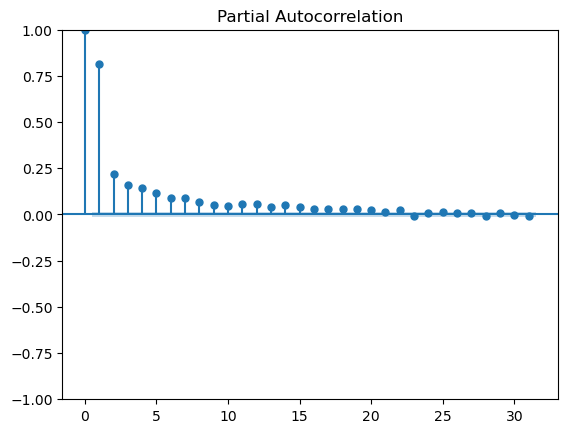

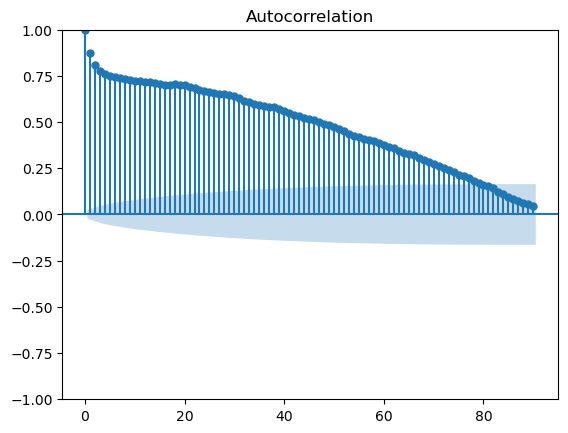

In [19]:
plot_pacf(lf_full.select("TMIN").collect().drop_nulls().to_series(), lags=31)
plot_pacf(lf_full.select("TMAX").collect().drop_nulls().to_series(), lags=31)
plot_acf(lf_full.select("TAVG").collect().drop_nulls().to_series(), lags=90)

plt.show()

In [20]:
date_str = lf_full.select("DATE").collect().to_series().str.to_datetime("%Y-%m-%d").dt

lf_full = lf_full.with_columns(
    date_str.year().alias("YEAR"),
    date_str.month().alias("MONTH"),
    date_str.day().alias("DAY")
    
)

lf_full.collect()

DATE,TAVG,TMAX,TMIN,TAVG_NEXT,TAVG_PREV,DAY,AVG_INDEX,YEAR,MONTH
str,f64,i64,i64,i64,i64,i8,f64,i32,i8
"""1954-04-01""",null,78,67,null,null,1,0.509094,1954,4
"""1954-04-02""",null,78,69,null,null,2,0.494966,1954,4
"""1954-04-03""",null,73,65,null,null,3,0.460848,1954,4
"""1954-04-04""",null,76,60,null,null,4,0.49379,1954,4
"""1954-04-05""",null,79,63,null,null,5,0.487971,1954,4
…,…,…,…,…,…,…,…,…,…
"""2025-08-10""",78.0,89,67,80,79,10,0.461912,2025,8
"""2025-08-11""",80.0,91,69,82,78,11,0.472883,2025,8
"""2025-08-12""",82.0,89,75,80,80,12,0.468168,2025,8


In [21]:
lf_full = lf_full.select(["YEAR", "MONTH", "DAY", "TAVG", "TMAX", "TMIN"])

lf_full.collect()

YEAR,MONTH,DAY,TAVG,TMAX,TMIN
i32,i8,i8,f64,i64,i64
1954,4,1,null,78,67
1954,4,2,null,78,69
1954,4,3,null,73,65
1954,4,4,null,76,60
1954,4,5,null,79,63
…,…,…,…,…,…
2025,8,10,78.0,89,67
2025,8,11,80.0,91,69
2025,8,12,82.0,89,75


In [22]:
lf_TMAXMIN = lf_full.select(["YEAR", "MONTH", "DAY", "TMAX", "TMIN"]).drop_nulls()
lf_TAVG = lf_full.select(["YEAR", "MONTH", "DAY", "TAVG"]).drop_nulls()
print(lf_TMAXMIN.collect())
print(lf_TAVG.collect())

shape: (25_950, 5)
┌──────┬───────┬─────┬──────┬──────┐
│ YEAR ┆ MONTH ┆ DAY ┆ TMAX ┆ TMIN │
│ ---  ┆ ---   ┆ --- ┆ ---  ┆ ---  │
│ i32  ┆ i8    ┆ i8  ┆ i64  ┆ i64  │
╞══════╪═══════╪═════╪══════╪══════╡
│ 1954 ┆ 4     ┆ 1   ┆ 78   ┆ 67   │
│ 1954 ┆ 4     ┆ 2   ┆ 78   ┆ 69   │
│ 1954 ┆ 4     ┆ 3   ┆ 73   ┆ 65   │
│ 1954 ┆ 4     ┆ 4   ┆ 76   ┆ 60   │
│ 1954 ┆ 4     ┆ 5   ┆ 79   ┆ 63   │
│ …    ┆ …     ┆ …   ┆ …    ┆ …    │
│ 2025 ┆ 8     ┆ 9   ┆ 87   ┆ 75   │
│ 2025 ┆ 8     ┆ 10  ┆ 89   ┆ 67   │
│ 2025 ┆ 8     ┆ 11  ┆ 91   ┆ 69   │
│ 2025 ┆ 8     ┆ 12  ┆ 89   ┆ 75   │
│ 2025 ┆ 8     ┆ 13  ┆ 87   ┆ 74   │
└──────┴───────┴─────┴──────┴──────┘
shape: (7_186, 4)
┌──────┬───────┬─────┬──────┐
│ YEAR ┆ MONTH ┆ DAY ┆ TAVG │
│ ---  ┆ ---   ┆ --- ┆ ---  │
│ i32  ┆ i8    ┆ i8  ┆ f64  │
╞══════╪═══════╪═════╪══════╡
│ 1998 ┆ 4     ┆ 1   ┆ 74.0 │
│ 1998 ┆ 4     ┆ 2   ┆ 74.0 │
│ 1998 ┆ 4     ┆ 3   ┆ 73.0 │
│ 1998 ┆ 4     ┆ 4   ┆ 75.0 │
│ 1998 ┆ 4     ┆ 5   ┆ 74.0 │
│ …    ┆ …     ┆ …   ┆ …    │
│ 20

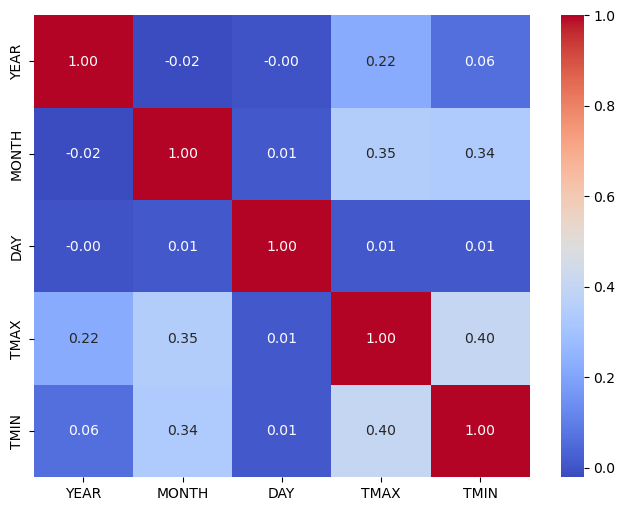

In [23]:
corr = lf_TMAXMIN.collect().corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.xticks([0.5, 1.5, 2.5, 3.5, 4.5], corr.columns)
plt.yticks([0.5, 1.5, 2.5, 3.5, 4.5], corr.columns)
plt.show()


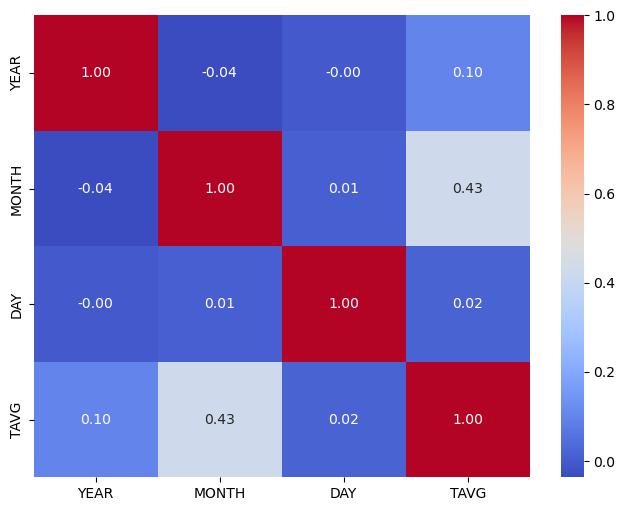

In [24]:
corr = lf_TAVG.collect().corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.xticks([0.5, 1.5, 2.5, 3.5], corr.columns)
plt.yticks([0.5, 1.5, 2.5, 3.5], corr.columns)
plt.show()

In [25]:
lf_TAVG = lf_TAVG.with_columns(

    pl.when((pl.col("MONTH") >= 3) & (pl.col("MONTH") <= 5)).then(3)
    .when((pl.col("MONTH") >= 6) & (pl.col("MONTH") <= 8)).then(2)
    .when((pl.col("MONTH") >= 9) & (pl.col("MONTH") <= 11)).then(1)
    .otherwise(0).alias("SEASON")

)

lf_TAVG = lf_TAVG.select(["YEAR", "SEASON", "MONTH", "DAY", "TAVG"])
lf_TAVG.collect()

YEAR,SEASON,MONTH,DAY,TAVG
i32,i32,i8,i8,f64
1998,3,4,1,74.0
1998,3,4,2,74.0
1998,3,4,3,73.0
1998,3,4,4,75.0
1998,3,4,5,74.0
…,…,…,…,…
2025,2,8,10,78.0
2025,2,8,11,80.0
2025,2,8,12,82.0


In [26]:
lf_TMAXMIN = lf_TMAXMIN.with_columns(

    pl.when((pl.col("MONTH") >= 3) & (pl.col("MONTH") <= 5)).then(3)
    .when((pl.col("MONTH") >= 6) & (pl.col("MONTH") <= 8)).then(2)
    .when((pl.col("MONTH") >= 9) & (pl.col("MONTH") <= 11)).then(1)
    .otherwise(0).alias("SEASON")    

)
lf_TMAXMIN = lf_TMAXMIN.select(["YEAR", "SEASON", "MONTH", "DAY", "TMAX", "TMIN"])
lf_TMAXMIN.collect()

YEAR,SEASON,MONTH,DAY,TMAX,TMIN
i32,i32,i8,i8,i64,i64
1954,3,4,1,78,67
1954,3,4,2,78,69
1954,3,4,3,73,65
1954,3,4,4,76,60
1954,3,4,5,79,63
…,…,…,…,…,…
2025,2,8,9,87,75
2025,2,8,10,89,67
2025,2,8,11,91,69


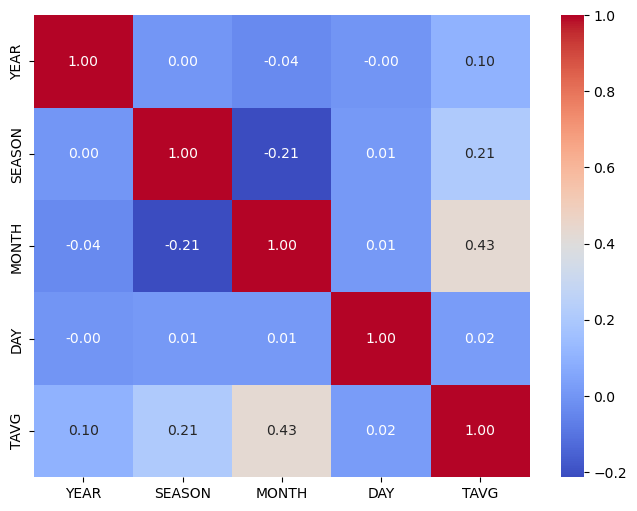

In [27]:
corr = lf_TAVG.collect().corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.xticks([0.5, 1.5, 2.5, 3.5, 4.5], corr.columns)
plt.yticks([0.5, 1.5, 2.5, 3.5, 4.5], corr.columns)
plt.show()

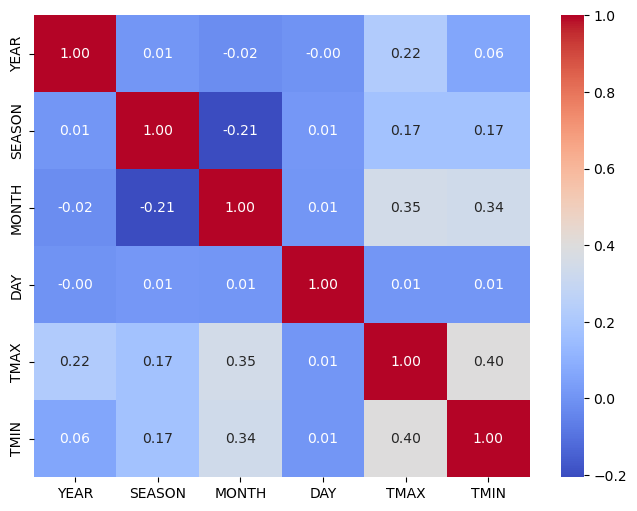

In [28]:
corr = lf_TMAXMIN.collect().corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.xticks([0.5, 1.5, 2.5, 3.5, 4.5, 5.5], corr.columns)
plt.yticks([0.5, 1.5, 2.5, 3.5, 4.5, 5.5], corr.columns)
plt.show()


In [29]:
model = ols("TAVG ~ SEASON", data = lf_TAVG.select(["SEASON", "TAVG"]).collect()).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
p_val = anova_table["PR(>F)"].loc["SEASON"].item()
if p_val < 0.05:
    print(f"P-Value is {p_val} << 0.05, null hypothesis is rejected and significant correlation between seasons and TAVG is concluded.")


P-Value is 8.91561044196766e-72 << 0.05, null hypothesis is rejected and significant correlation between seasons and TAVG is concluded.


In [30]:
model = ols("TMAX ~ SEASON", data = lf_TMAXMIN.select(["SEASON", "TMAX"]).collect()).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
p_val = anova_table["PR(>F)"].loc["SEASON"].item()
if p_val < 0.05:
    print(f"P-Value is {p_val} << 0.05, null hypothesis is rejected and significant correlation between seasons and TMAX is concluded.")


P-Value is 5.475777316927192e-175 << 0.05, null hypothesis is rejected and significant correlation between seasons and TMAX is concluded.


In [31]:
model = ols("TMIN ~ SEASON", data = lf_TMAXMIN.select(["SEASON", "TMIN"]).collect()).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
p_val = anova_table["PR(>F)"].loc["SEASON"].item()
if p_val < 0.05:
    print(f"P-Value is {p_val} << 0.05, null hypothesis is rejected and significant correlation between seasons and TMIN is concluded.")


P-Value is 1.1436122172750012e-176 << 0.05, null hypothesis is rejected and significant correlation between seasons and TMIN is concluded.


In [32]:
min_year = 1954
max_year = 2028
selected_columns = ["YEAR", "WINTER", "AUTUMN", "SUMMER", "SPRING", "MONTH_SIN", "MONTH_COS", "DAY_SIN", "DAY_COS"]

lf_TAVG = lf_TAVG.with_columns(

    ((pl.col("YEAR") - min_year) / (max_year - min_year)).alias("YEAR"),
    pl.when(pl.col("SEASON") == 3).then(1).otherwise(0).alias("WINTER"),
    pl.when(pl.col("SEASON") == 2).then(1).otherwise(0).alias("AUTUMN"),
    pl.when(pl.col("SEASON") == 1).then(1).otherwise(0).alias("SUMMER"),
    pl.when(pl.col("SEASON") == 0).then(1).otherwise(0).alias("SPRING"),
    np.sin(2 * np.pi * ((pl.col("MONTH") - 1) / 11)).cast(pl.Float64).alias("MONTH_SIN"),
    np.cos(2 * np.pi * ((pl.col("MONTH") - 1) / 11)).cast(pl.Float64).alias("MONTH_COS"),
    np.sin(2 * np.pi * ((pl.col("DAY") - 1) / pl.col("DAY").max() - 1)).cast(pl.Float64).alias("DAY_SIN"),
    np.cos(2 * np.pi * ((pl.col("DAY") - 1) / pl.col("DAY").max() - 1)).cast(pl.Float64).alias("DAY_COS"),
    pl.col("TAVG").shift(-1).alias("TAVG_t-1"),
    pl.col("TAVG").shift(-2).alias("TAVG_t-2"),
    pl.col("TAVG").shift(-3).alias("TAVG_t-3"),
    pl.col("TAVG").shift(-4).alias("TAVG_t-4"),
    pl.col("TAVG").shift(-5).alias("TAVG_t-5"),
    pl.col("TAVG").shift(-6).alias("TAVG_t-6"),
    pl.col("TAVG").shift(-7).alias("TAVG_t-7"),
    pl.col("TAVG").shift(-8).alias("TAVG_t-8"),
    pl.col("TAVG").shift(-9).alias("TAVG_t-9"),
    pl.col("TAVG").shift(-10).alias("TAVG_t-10"),
    
).select(selected_columns + ["TAVG"])

lf_TMAXMIN = lf_TMAXMIN.with_columns(

    ((pl.col("YEAR") - min_year) / (max_year - min_year)).alias("YEAR"),
    pl.when(pl.col("SEASON") == 3).then(1).otherwise(0).alias("WINTER"),
    pl.when(pl.col("SEASON") == 2).then(1).otherwise(0).alias("AUTUMN"),
    pl.when(pl.col("SEASON") == 1).then(1).otherwise(0).alias("SUMMER"),
    pl.when(pl.col("SEASON") == 0).then(1).otherwise(0).alias("SPRING"),
    np.sin(2 * np.pi * ((pl.col("MONTH") - 1) / 11)).cast(pl.Float64).alias("MONTH_SIN"),
    np.cos(2 * np.pi * ((pl.col("MONTH") - 1) / 11)).cast(pl.Float64).alias("MONTH_COS"),
    np.sin(2 * np.pi * ((pl.col("DAY") - 1) / pl.col("DAY").max() - 1)).cast(pl.Float64).alias("DAY_SIN"),
    np.cos(2 * np.pi * ((pl.col("DAY") - 1) / pl.col("DAY").max() - 1)).cast(pl.Float64).alias("DAY_COS"),
    pl.col("TMAX").shift(-1).alias("TMAX_t-1"),
    pl.col("TMAX").shift(-2).alias("TMAX_t-2"),
    pl.col("TMAX").shift(-3).alias("TMAX_t-3"),
    pl.col("TMAX").shift(-4).alias("TMAX_t-4"),
    pl.col("TMAX").shift(-5).alias("TMAX_t-5"),
    pl.col("TMAX").shift(-6).alias("TMAX_t-6"),
    pl.col("TMAX").shift(-7).alias("TMAX_t-7"),
    pl.col("TMAX").shift(-8).alias("TMAX_t-8"),
    pl.col("TMAX").shift(-9).alias("TMAX_t-9"),
    pl.col("TMAX").shift(-10).alias("TEMP_t-10"),
    pl.col("TMIN").shift(-1).alias("TMIN_t-1"),
    pl.col("TMIN").shift(-2).alias("TMIN_t-2"),
    pl.col("TMIN").shift(-3).alias("TMIN_t-3"),
    pl.col("TMIN").shift(-4).alias("TMIN_t-4"),
    pl.col("TMIN").shift(-5).alias("TMIN_t-5"),
    pl.col("TMIN").shift(-6).alias("TMIN_t-6"),
    pl.col("TMIN").shift(-7).alias("TMIN_t-7"),
    pl.col("TMIN").shift(-8).alias("TMIN_t-8"),
    pl.col("TMIN").shift(-9).alias("TMIN_t-9"),
    pl.col("TMIN").shift(-10).alias("TMIN_t-10"),
    
).select(selected_columns + ["TMAX", "TMIN"])

In [33]:
X_TAVG = lf_TAVG.select(selected_columns)
y_TAVG = lf_TAVG.select("TAVG")
X_TAVG = lf_TAVG.with_columns(

    (pl.all() - pl.all().min()) / (pl.all().max() - pl.all().min())

)

X_TMAXMIN = lf_TMAXMIN.select(selected_columns)
y_TMAXMIN = lf_TMAXMIN.select(["TMAX", "TMIN"])
X_TMAXMIN = lf_TMAXMIN.with_columns(

    (pl.all() - pl.all().min()) / (pl.all().max() - pl.all().min())

)

X_TAVG.describe()

statistic,YEAR,WINTER,AUTUMN,SUMMER,SPRING,MONTH_SIN,MONTH_COS,DAY_SIN,DAY_COS,TAVG
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",7186.0,7186.0,7186.0,7186.0,7186.0,7186.0,7186.0,7186.0,7186.0,7186.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",0.534625,0.259254,0.261759,0.240468,0.238519,0.504847,0.516832,0.503188,0.49027,0.544637
"""std""",0.334209,0.438256,0.439623,0.427397,0.426208,0.341597,0.374988,0.356694,0.351686,0.165163
"""min""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""25%""",0.185185,0.0,0.0,0.0,0.0,0.2269,0.155465,0.137138,0.118359,0.428571
"""50%""",0.62963,0.0,0.0,0.0,0.0,0.5,0.417036,0.5,0.473324,0.571429
"""75%""",0.814815,1.0,1.0,0.0,0.0,0.881761,0.918986,0.862862,0.844083,0.666667
"""max""",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [34]:
X_TMAXMIN.describe()

statistic,YEAR,WINTER,AUTUMN,SUMMER,SPRING,MONTH_SIN,MONTH_COS,DAY_SIN,DAY_COS,TMAX,TMIN
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",25950.0,25950.0,25950.0,25950.0,25950.0,25950.0,25950.0,25950.0,25950.0,25950.0,25950.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",0.500299,0.250906,0.253834,0.248825,0.246435,0.497701,0.52883,0.502609,0.489936,0.59988,0.630495
"""std""",0.28943,0.433543,0.435212,0.43234,0.430943,0.341639,0.373877,0.356609,0.351733,0.128122,0.148532
"""min""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""25%""",0.253521,0.0,0.0,0.0,0.0,0.118239,0.155465,0.137138,0.118359,0.5,0.516129
"""50%""",0.507042,0.0,0.0,0.0,0.0,0.5,0.417036,0.5,0.473324,0.625,0.645161
"""75%""",0.746479,1.0,1.0,0.0,0.0,0.881761,0.918986,0.862862,0.844083,0.6875,0.741935
"""max""",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
